# IRIS (DL project # 3)

In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

/home/hp/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [23]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [24]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# baseline model

In [5]:
# define baseline model
def baseline_model():
                # create model
                model = Sequential()
                model.add(Dense(8,activation='relu',  input_shape=(X.shape[1],)))
                model.add(Dense(3, activation='softmax'))
                # Compile model
                model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
                return model

model = baseline_model()

In [6]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

# Step 4. Evaluate The Model with k-Fold Cross Validation

In [7]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [8]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 94.67% (11.85%)


# Step 5. Tuning Layers and Number of Neurons in The Model

### Step 5.1. Evaluate a Smaller Network

In [9]:
def smaller():
                # create model
                model = Sequential()
                model.add(Dense(4,activation='relu',  input_shape=(X.shape[1],)))
                model.add(Dense(3, activation='softmax'))
                # Compile model
                model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
                return model

smaller_model = smaller()
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 97.33% (3.27%)


### Step 5.2. Evaluate a Larger Network

In [10]:
def Larger():
                # create model
                model = Sequential()
                model.add(Dense(8,activation='relu',  input_shape=(X.shape[1],)))
                model.add(Dense(4, activation='relu'))
                model.add(Dense(3, activation='softmax'))
                # Compile model
                model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
                return model

# Larger_model = Larger()
estimator = KerasClassifier(build_fn=Larger, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 88.67% (21.30%)


# Step 6. Really Scaling up: developing a model that overfits

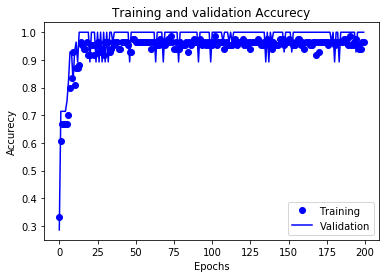

96.0 % accurecy


In [25]:
def overfit():
                    # create model
                    model = Sequential()
                    model.add(Dense(20,activation='relu',  input_shape=(X.shape[1],)))
                    model.add(Dense(12,activation='relu'))
                    model.add(Dense(8,activation='relu'))
                    model.add(Dense(3, activation='softmax'))
                    # Compile model
                    model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
                    return model
            
history = []

model = overfit()

X_train, X_test, y_train, y_test       = train_test_split(X, dummy_y)
# split train data into train and validation
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train)

history = model.fit(X_train, y_train,epochs=200,batch_size=5, verbose=False,validation_data=(X_val, y_val))
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], 'bo', label='Training')
plt.plot(history.history['val_acc'], 'b', label='Validation')
plt.title('Training and validation Accurecy')
plt.xlabel('Epochs')
plt.ylabel('Accurecy')
plt.legend()
plt.show()
print(round(history.history['acc'][-1]*100), '% accurecy')

# Step 7. Tuning the Model

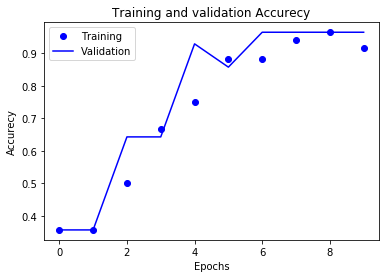

91.66666709241413 % accurecy


In [42]:

def Tuning():

                # create model
                model = Sequential()
                model.add(Dense(8,activation='relu',  input_shape=(X.shape[1],)))
                model.add(Dense(4, activation='relu'))
                model.add(Dense(3, activation='softmax'))
                # Compile model
                model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
                return model


X_train, X_test, y_train, y_test       = train_test_split(X, dummy_y)
# split train data into train and validation
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train)

model = Tuning()
history = model.fit(X_train, y_train,epochs=10,batch_size=5, verbose=False,validation_data=(X_val, y_val))
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], 'bo', label='Training')
plt.plot(history.history['val_acc'], 'b', label='Validation')
plt.title('Training and validation Accurecy')
plt.xlabel('Epochs')
plt.ylabel('Accurecy')
plt.legend()
plt.show()
print(history.history['acc'][-1]*100, '% accurecy')

# Step 8. Rewriting the code by doing Model Subclassing

In [38]:
# you should define your layers in __init__ and you should implement the model's forward pass in call.

import tensorflow as tf
import keras
class MyModel(tf.keras.Model):
    
        def __init__(self):
            
                        super(MyModel, self).__init__()
                        self.dense1 = Dense(8, activation="relu")
                        self.dense2 = Dense(4, activation='relu')
                        self.dense3 = Dense(3)

        def call(self, inputs):

                        x = self.dense1(inputs)
                        x = self.dense2(x)
                        return self.dense3(x)
                        
                    
model = MyModel()
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.fit(X_train, y_train,epochs=51,batch_size=5, verbose=False,validation_data=(X_val, y_val))

# Step 9. Rewriting the code without using scikit-learn
### Once you have written the model in all three API style you are required to do k-fold cross validation without using scikit-learn library.


In [43]:
import matplotlib.pyplot as plt
import numpy as np
# Data shufflYingdummy_y
from random import shuffle
ind_list = [i for i in range(len(X))]
shuffle(ind_list)
X  = X[ind_list]
Y = dummy_y[ind_list]

# Normalizing the data
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std


test_x = X[:22]
test_y= Y[:22]

X = X[22:]
Y = Y[22:]


all_val_mae = []
history = []

k = 4
num_val_samples = len(X) // k
num_epochs = 50
for i in range(k):
                            val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
                            val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
                            partial_train_data = np.concatenate([X[:i * num_val_samples],X[(i + 1) * num_val_samples:]],axis=0)
                            partial_train_targets = np.concatenate([Y[:i * num_val_samples],Y[(i + 1) * num_val_samples:]],axis=0)
                            model =Tuning ()
                            a = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=5,shuffle=True, verbose=0,validation_data=(val_data, val_targets))
                            history.append(a)
                            a, b = model.evaluate(test_x, test_y, verbose=0)
                            all_val_mae.append(b)

print(np.mean( all_val_mae))

0.9545454531908035
